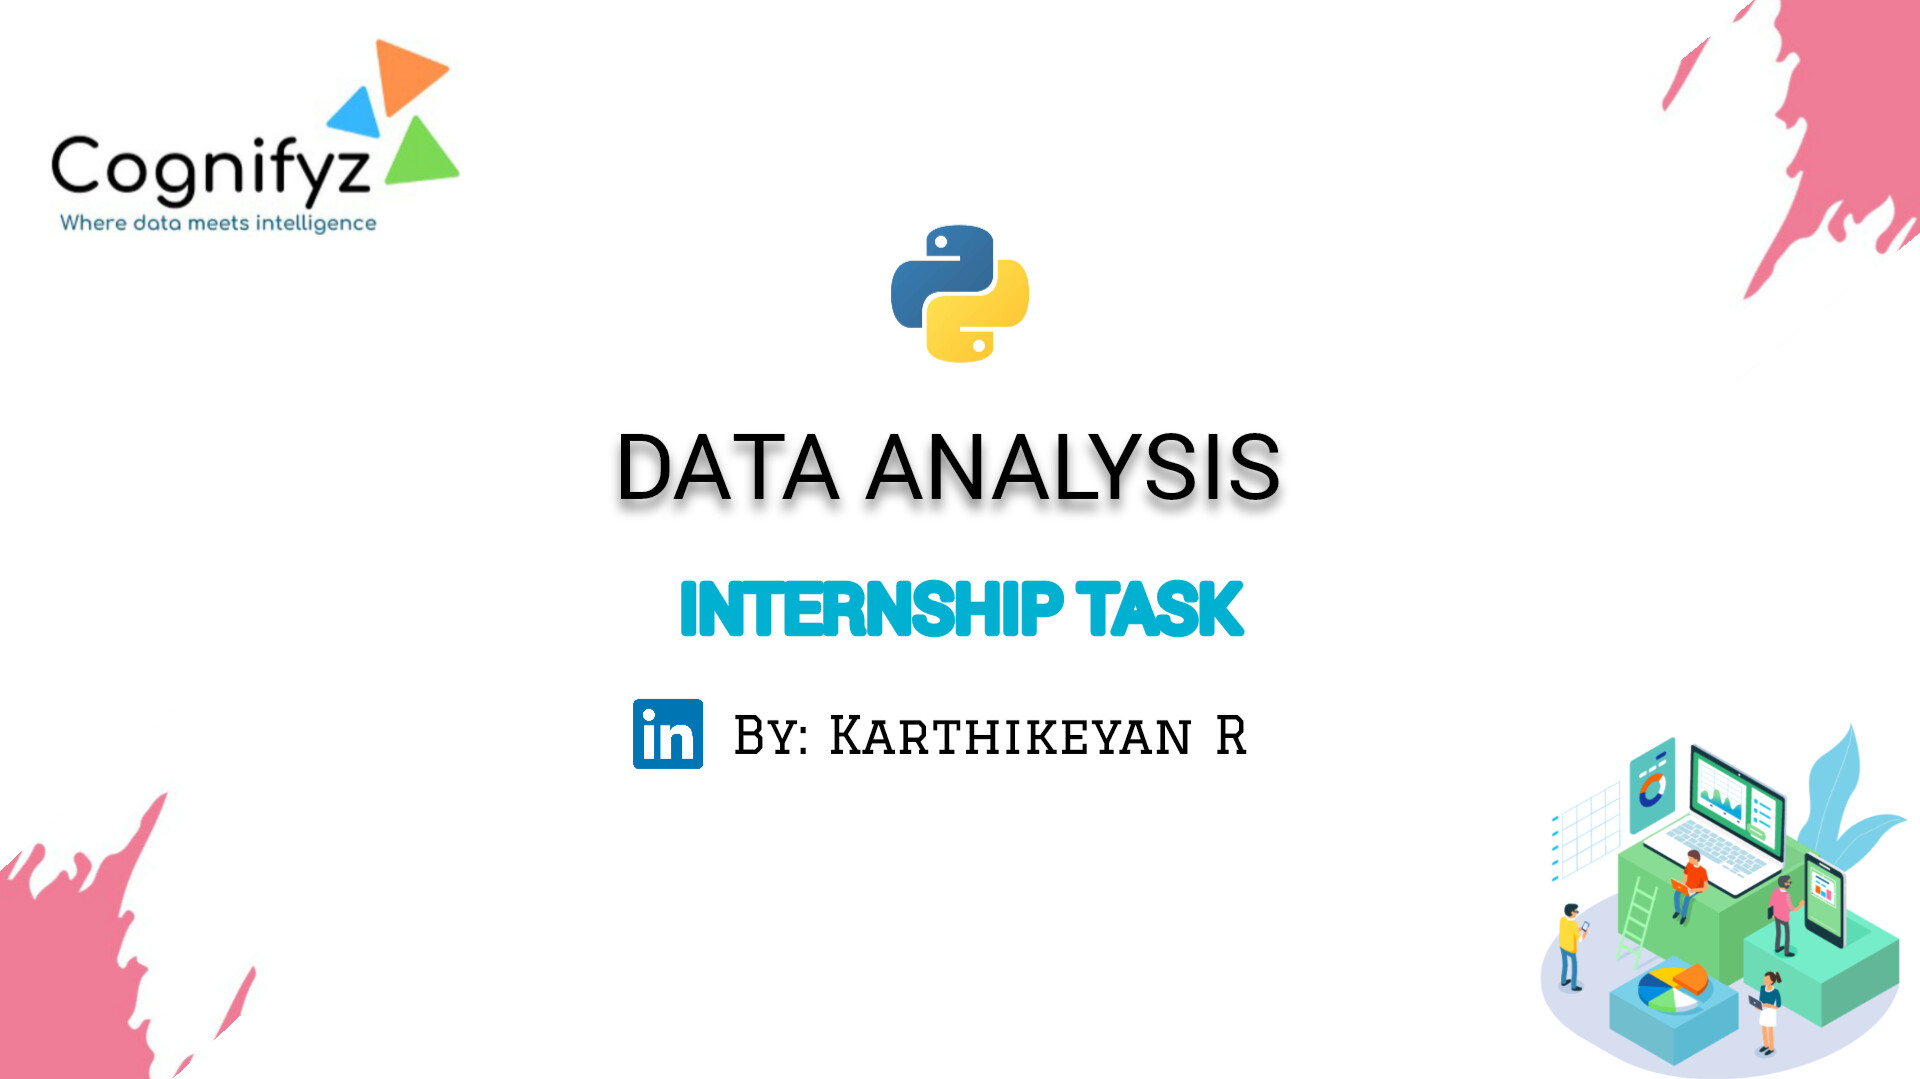

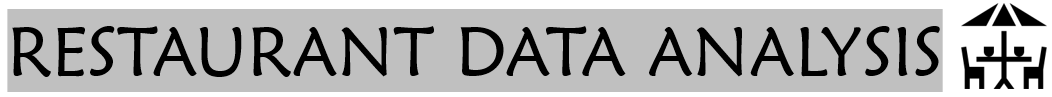

This project aims to analyze a dataset containing restaurant information.The analysis focuses on various aspects,such as
the distribution of ratings,the relationship between votes and ratings,the availability of online delivery and table booking across different price ranges and identifying common positive and negative keywords in text reviews.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Dataset .csv")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# checking for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# Filling the null values with unknown
df['Cuisines'].fillna('unknown', inplace = True)

In [6]:
df.shape

(9551, 21)

In [7]:
#Statistics summary 
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# **LEVEL 1 - Task 1 : Top Cuisines**

**Determine the top three most
common cuisines in the dataset.
Calculate the percentage of
restaurants that serve each of the top
cuisines**

In [8]:
cuisines_counts = df['Cuisines'].str.split(', ').explode().value_counts()
Top_3_Cuisines = cuisines_counts.head(3)
Top_3_Cuisines

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

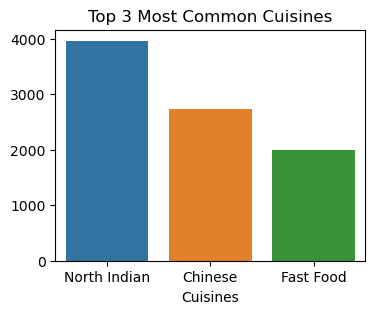

In [9]:
plt.figure(figsize = (4,3))
sns.barplot(x = Top_3_Cuisines.index , y = Top_3_Cuisines.values)
plt.title('Top 3 Most Common Cuisines')
plt.show()

**Calculate the percentage of restaurants that serve each of the top cuisines**

In [10]:
total_restaurants = len(df)
total_restaurants

9551

In [11]:
percentage = (cuisines_counts/total_restaurants) * 100
percentage.head(5)

Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64

# **LEVEL 1 - Task 2 : City Analysis**

**Identify the city with the highest number of restaurants in the dataset**

In [12]:
city = df.groupby('City')['Restaurant ID'].count().sort_values(ascending = False)
city.head(1)

City
New Delhi    5473
Name: Restaurant ID, dtype: int64

**Calculate the average rating for restaurants in each city**

In [13]:
avg_ratings = df.groupby('City')['Aggregate rating'].mean()
avg_ratings

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

**Determmine the city with the highest average rating**

In [14]:
city_highest_avg_rating = avg_ratings.sort_values(ascending=False)

city_highest_avg_rating.index[0]

# or

#city_highest_avg_rating = avg_ratings.idxmax()
#city_highest_avg_rating

'Inner City'

# **LEVEL 1 - Task 3 : Price Range Prediction**

**Create a histogram or bar chat to visualize the distribution of price ranges among the restaurants**

In [15]:
price_range_counts = df['Price range'].value_counts()
price_range_counts

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

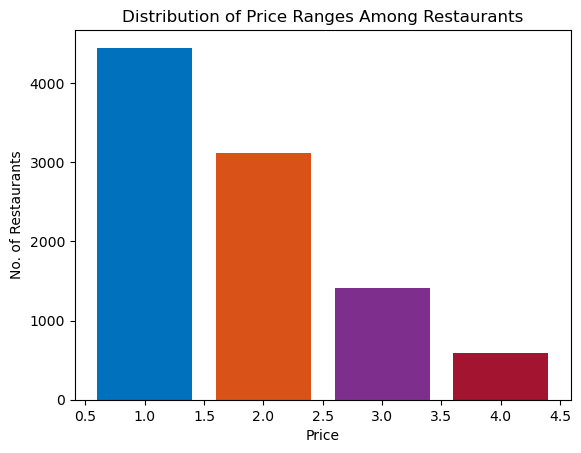

In [16]:
plt.figure.figsize = (5, 3)
colors = ['#0072BD','#D95319','#7E2F8E','#A2142F']
plt.bar(price_range_counts.index, price_range_counts.values, color = colors)
plt.xlabel('Price')
plt.ylabel('No. of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()
     

**Calculate the percentage of restaurants in each price range category**

In [17]:
total_restaurants = len(df)
total_restaurants

9551

In [18]:
pct_price_range = (price_range_counts/total_restaurants) * 100
pct_price_range

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

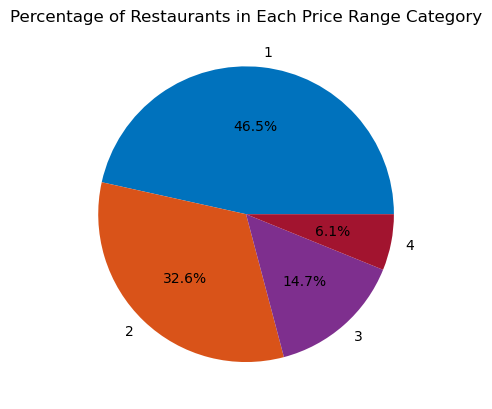

In [19]:
plt.figure.figsize = (5, 3)
plt.pie(pct_price_range, labels=pct_price_range.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of Restaurants in Each Price Range Category')
plt.show()

# **LEVEL 1 - Task 4 : Online Delivery**

**Determine the percentage of restaurants
that offer online delivery**

In [20]:
online_delivery_percentage = (df['Has Online delivery'].map({'Yes': True, 'No': False}).astype(int).sum() / len(df)) * 100
online_delivery_percentage

25.662234321013504

**Compare the average ratings of restaurants
with and without online delivery**

In [21]:
avg_rating_with_delivery    = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print("Average rating with delivery:", avg_rating_with_delivery)
print("Average rating without delivery:", avg_rating_without_delivery)

Average rating with delivery: 3.2488372093023257
Average rating without delivery: 2.465295774647887


### Level 1  - Conclusion

$Task - 1:$

1. North Indian, Chinese and Fast Food are the Top Three Cuisines
2. The Percentage of Top Cuisines serve by the Restaurants are North Indian 41.461627,Chinese 28.635745,Fast Food 20.793634,Mughlai 10.417757 and Italian 7.999162

$Task - 2:$

1. The City of New Delhi has the highest number of Restaurants
2. Compare to all the cities of restaurant the Inner City has the highest average rating 


$Task - 3:$

1. The majority of restaurants fall in the lowest price range (1) with 4,444 establishments, while the number decreases significantly as the price range increases, with only 586 in the highest range (4). This trend highlights a strong preference for affordable dining options.

2. Nearly half of the restaurants fall into the lowest price range (1) with 46.53%, while only 6.14% occupy the highest range (4), indicating a strong market preference for more affordable dining options.

$Task - 4:$

1. Only 25.66% of restaurants offer online delivery, suggesting that while the option is available, the majority of establishments still rely on traditional dining or takeaway services.

2. Restaurants offering online delivery have a higher average rating of 3.25 compared to 2.47 for those without, indicating that online delivery may be associated with better customer satisfaction.

# **LEVEL 2 - Task 1 : Restaurant Ratings**

**Analyze the distribution of aggregate
ratings and determine the most common
rating range**

In [22]:
Avg_rating_common_range = df['Aggregate rating'].value_counts()
print(Avg_rating_common_range)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


**Calculate the average number of votes
received by restaurants**

In [23]:
average_votes = df['Votes'].mean()
print("Average number of votes:", average_votes)

Average number of votes: 156.909747670401


# **LEVEL 2 - Task 2 : Cuisine Combination**

**Identify the most common combinations of
cuisines in the dataset**

In [24]:
most_common_cuisine_comb = df['Cuisines'].value_counts()
most_common_cuisine_comb.head(5)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

**Determine if certain cuisine combinations
tend to have higher ratings**

In [25]:
cuisine_higher_ratings = df.groupby('Cuisines')['Aggregate rating'].count().sort_values(ascending = False)
cuisine_higher_ratings.head(5)     

Cuisines
North Indian             936
North Indian, Chinese    511
Fast Food                354
Chinese                  354
North Indian, Mughlai    334
Name: Aggregate rating, dtype: int64

# **LEVEL 2 - Task 3 : Geographic Analysis**

Here there is need of map visualisation. so we cant analyse the question related to this task in python

# **LEVEL 2 - Task 4 : Restaurant Chains**

**Identify if there are any restaurant chains
present in the dataset**

In [26]:
restaurant = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant[restaurant > 1]
restaurant_chains

Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64

**Analyze the ratings and popularity of
different restaurant chains**

In [27]:
## Filter the dataset to include only restaurant chains
chains_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]

## Group by 'Restaurant Name' and calculate average rating and total votes
chains_stats = chains_data.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).reset_index()

## Sort by average rating and total votes for analysis
chains_stats = chains_stats.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False])

## Display the top restaurant chains by rating and popularity
print(chains_stats.head(10))


               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
293                   Gymkhana             4.700    328
653     The Cheesecake Factory             4.650   3010
218                    Dishoom             4.600   1269
267          Garota de Ipanema             4.600     59
163                    Chili's             4.580   8156


## Level 2 - Conclusion

$Task - 1:$

1. The most common rating is 0.0, likely indicating unrated restaurants, followed by a concentration in the 3.0 to 3.9 range, suggesting moderate customer satisfaction. Higher ratings above 4.0 are less frequent, indicating fewer standout establishments.

2. On average, restaurants receive approximately 157 votes.

$Task - 2:$

1. The most common cuisines are North Indian, followed by North Indian and Chinese. Fast Food and Chinese cuisines are also popular, each with a significant number of listings.

2. North Indian cuisine and its combinations tend to have higher ratings, with North Indian alone leading, followed by North Indian and Chinese.

$Task - 4:$

1. the dataset includes several restaurant chains, with Cafe Coffee Day, Domino's Pizza, Subway, and McDonald's among the most frequently listed.

2. Restaurant chains like AB's - Absolute Barbecues and Talaga Sampireun have high ratings and significant popularity, with AB's leading in votes and ratings.

# **LEVEL 3 - Task 1 : Restaurant Reviews**

**Analyze the text reviews to identify the most
common positive and negative keywords**

In [28]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [29]:
from collections import Counter
import re

#Extract and clean the 'Rating text' column
reviews = df['Rating text'].dropna().tolist()

#Define a function to tokenize and clean text
def tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()  # Split into words
    return tokens

# Tokenize all reviews
all_tokens = []
for review in reviews:
    all_tokens.extend(tokenize(review))

# Step 4: Count the frequency of each token
token_counts = Counter(all_tokens)

# Display the most common tokens
print("Most common tokens:", token_counts.most_common(20))

# Step 5: Define a list of words to ignore
ignore_words = {'rated', 'very'}

# Filter out ignored words
filtered_counts = {word: count for word, count in token_counts.items() if word not in ignore_words}

# Step 6: Separate positive and negative keywords
positive_keywords = {'good', 'excellent'}
negative_keywords = {'poor', 'not'}

# Get the frequency of positive and negative keywords
positive_counts = {word: filtered_counts[word] for word in positive_keywords if word in filtered_counts}
negative_counts = {word: filtered_counts[word] for word in negative_keywords if word in filtered_counts}

# Display the counts of positive and negative keywords
print("Positive Keywords:", positive_counts)
print("Negative Keywords:", negative_counts)


Most common tokens: [('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]
Positive Keywords: {'good': 3179, 'excellent': 301}
Negative Keywords: {'poor': 186, 'not': 2148}


**Calculate the average length of reviews and explore if there is a relationship between review length and rating**

In [30]:
df['review_length'] = df['Rating text'].dropna().str.len()  # Add a column for review length
avg_len_review = df['review_length'].mean()
print(f"Average length of reviews: {avg_len_review:.2f} characters")

Average length of reviews: 7.02 characters


In [31]:
rating_length_mean = df.groupby('Rating text')['review_length'].mean().sort_values(ascending = False).reset_index()
rating_length_mean

,Rating text,review_length
0,Excellent,9.0
1,Not rated,9.0
2,Very Good,9.0
3,Average,7.0
4,Good,4.0
5,Poor,4.0


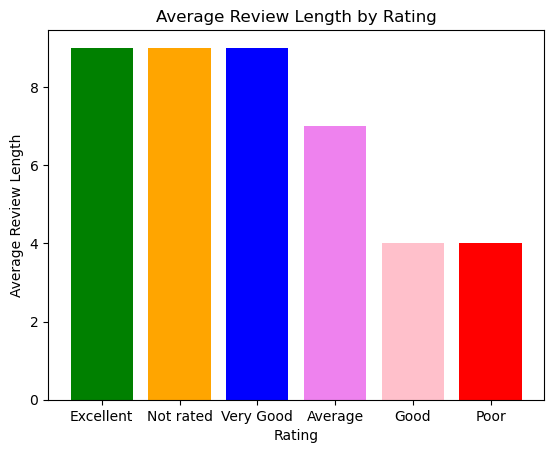

In [32]:
plt.figure.figsize=(5,3)
colors = ['green', 'orange', 'blue', 'violet','pink','red']
plt.bar(rating_length_mean['Rating text'], rating_length_mean['review_length'], color = colors)
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.title('Average Review Length by Rating')
plt.show()

# **LEVEL 3 - Task 2 : Vote Analysis**

**Identify the restaurants with the highest and lowest number of votes**

In [33]:
highest_votes = df.groupby('Restaurant Name')['Votes'].max().sort_values(ascending = False).reset_index().nlargest(1,'Votes')
lowest_votes = df.groupby('Restaurant Name')['Votes'].min().sort_values(ascending = True).reset_index().nsmallest(1,'Votes')
print('\nRestaurants with the highest number of votes :') 
print(highest_votes)

print('\n----------------')

print('\nRestaurants with the lowest number of votes :') 
print(lowest_votes)


Restaurants with the highest number of votes :
  Restaurant Name  Votes
0            Toit  10934

----------------

Restaurants with the lowest number of votes :
     Restaurant Name  Votes
0  Laxmi Food Corner      0


**Analyze if there is a correlation between the
number of votes and the rating of a
restaurant**

In [34]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between votes and rating:", correlation)

Correlation between votes and rating: 0.31369058419541035


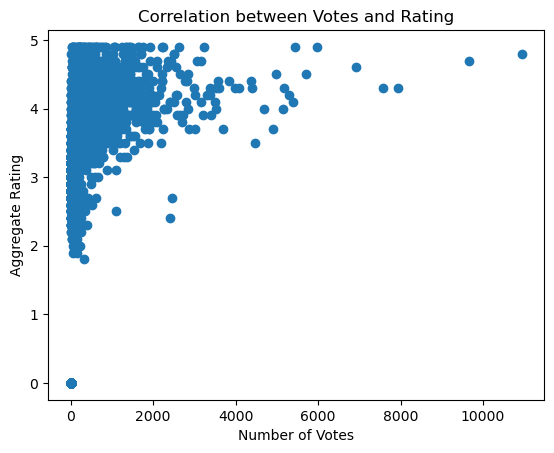

In [35]:
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Correlation between Votes and Rating')
plt.show()

# **LEVEL 3 - Task 3 : Price Range vs Online Delivery & Table Booking**

**Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking**

In [36]:
# checking the unique values in these columns
print(df['Price range'].unique())
print(df['Has Online delivery'].unique())
print(df['Has Table booking'].unique())

[3 4 2 1]
['No' 'Yes']
['Yes' 'No']


In [37]:
# replacing string into number because we can't group a string
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [38]:
print(df['Price range'].unique())
print(df['Has Online delivery'].unique())
print(df['Has Table booking'].unique())

[3 4 2 1]
[0 1]
[1 0]


In [39]:
relationship = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean()
relationship     

,Has Online delivery,Has Table booking
Price range,,
1,0.157741,0.000225
2,0.413106,0.076775
3,0.291903,0.457386
4,0.090444,0.467577


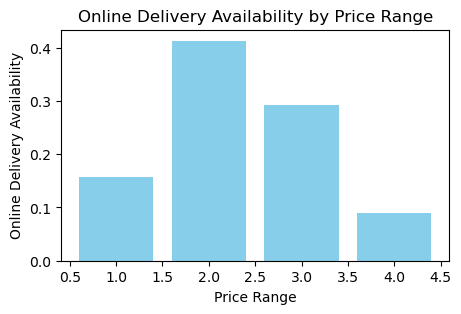

In [40]:
plt.figure(figsize=(5, 3))
plt.bar(relationship.index, relationship['Has Online delivery'], color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Online Delivery Availability')
plt.title('Online Delivery Availability by Price Range')
plt.show()

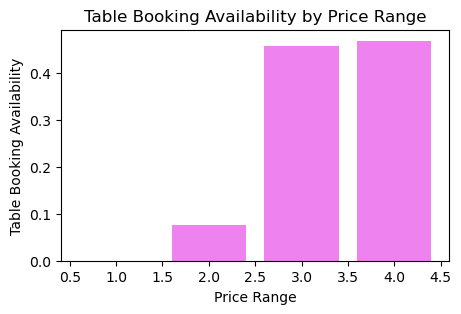

In [41]:
plt.figure(figsize=(5, 3))
plt.bar(relationship.index, relationship['Has Table booking'], color='violet')
plt.xlabel('Price Range')
plt.ylabel('Table Booking Availability')
plt.title('Table Booking Availability by Price Range')
plt.show()

**Determine if higher-priced restaurants are
more likely to offer these services**

In [42]:
high_oda = df[df['Price range'] == 4 ]
offer_delivery = high_oda.groupby('Has Online delivery')['Price range'].count()
offer_delivery

Has Online delivery
0    533
1     53
Name: Price range, dtype: int64

In [43]:
high_tba = df[df['Price range'] == 4 ]
offer_booking= high_tba.groupby('Has Table booking')['Price range'].count()
offer_booking

Has Table booking
0    312
1    274
Name: Price range, dtype: int64

By the Conclusion we know the High Priced Restaurants are mostly offering the Table Bookiing services rather than Online Delivery

## Level 3 - Conclusion

$Task - 1:$

1. Common positive keywords in reviews are 'good' and 'excellent,' while 'not' and 'poor' are the most frequent negative keywords.

2. Review length varies by rating, with 'Excellent' and 'Very Good' reviews typically being longer, while 'Good' and 'Poor' reviews tend to be shorter

$Task - 2:$

1. Toit has the highest number of votes with 10,934, while Laxmi Food Corner has the lowest with zero votes.

2. There is a moderate positive correlation of 0.31 between the number of votes and restaurant ratings, suggesting that higher-rated restaurants tend to receive more votes.

$Task - 3:$

1. Price range 2 shows a strong correlation with online delivery (0.41) and a moderate correlation with table booking (0.08), while higher price ranges (3 and 4) are more strongly associated with table booking (0.46) rather than online delivery.

2. The High Priced Restaurants are mostly offering the Table Bookiing services rather than Online Delivery

## Final Conclusion 


1. City: New Delhi has the highest number of restaurants, with a total of 5,473, followed by Gurgaon with 1118 restarunts. The Ojo Caliente city has the lowest, with just 1 restaurant."


2. Restaurant: To leads with the highest number of votes, accumulating a  votes, followed by AB's - Absolute Barbecues 16551 votes, followed by Talaga Sampireun 5514 votes. The resturants with the lowest number of votes a Talaga Sampireun with 5514 votes.


3. Cuisines: North Indian cuisine and its combinations tend to have higher ratings, with North Indian alone leading, followed by North Indian and Chinese. The Least common cuisine combinations, such as French and Japanese or Ice Cream and North Indian, tend to have lower ratings.